In [253]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from fbprophet import Prophet




#data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Time_predictions_on_all_columns\\'
#fa = pd.read_csv(data_path)
#entire_dataset = pd.read_csv(data_path2)

Function to pick which data to perform time prediction analysis on. 1 is for emails received, 2 is all gmail data, 3 is the five attributes

In [254]:
def pick_your_poison(number):
    if (number == 1):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\cbt.csv")
        print("You picked cbt.csv")
    if (number == 2):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        print("You picked overall data")
    if (number == 3):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        df = df[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']]
        print("The five attributes")
    else:
        df = []
        print("No dataset for you")
    return df
    

Function to pass column time as a date time object and set time as an index. It is important for plotting

In [255]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df.set_index(df.columns[0], inplace=True)
    return df

Function to plot the predicted values and the original data

In [256]:
def plot(df,df0):
    df1 = df.copy()
    df2 = df0.copy()
    df1 = time_set(df1)
    df2 = time_set(df2)
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

Function to do time prediction with log

In [257]:
#p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', growth = "linear")

#def semester(ds):
   # date = pd.to_datetime(ds)
   # return ((date.month >= 8 or date.month < 12) and (date.month >= 1 or date.month < 5))
def timepredictionLog(df,csvfilename):
    p = Prophet(weekly_seasonality=True, changepoint_prior_scale=0.8)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    df['y'] = df['y'] + 1
    df['y'] = np.log(df['y'])
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df['y'] = np.exp(df['y'])-1
    #time_pred[time_pred.columns[1:]] = np.exp(time_pred[time_pred.columns[1:]])
    time_pred['yhat'] = np.exp(time_pred['yhat'])-1
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    print(csvfilename)
    p.plot(time_pred)
    return df1,df2,time_pred

Function to do time prediction without log

In [258]:
def timeprediction123(df,csvfilename):
    p = Prophet(weekly_seasonality=True,changepoint_prior_scale=0.5)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    print(csvfilename)
    p.plot(time_pred)
    return df1,df2,time_pred

Function to send all columns in a dataframe to timeprediction123

In [259]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1] + '_time_prediction.csv')[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : five_att.columns[1]})
    df1= df.drop(columns= [five_att.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1] + '_time_prediction.csv')[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

Time prediction actually begins here

In [260]:
five_att = pick_your_poison(3)

The five attributes


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


emails_received_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


emails_sent_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


inbound_rejected_emails_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


inbound_spam_emails_time_prediction.csv
inbound_non_spam_emails_time_prediction.csv


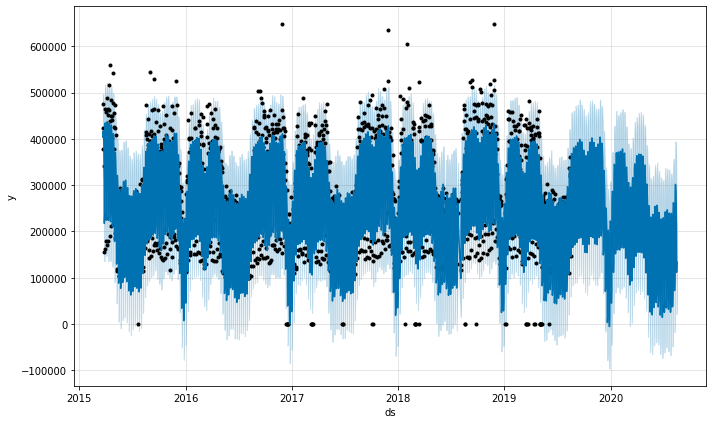

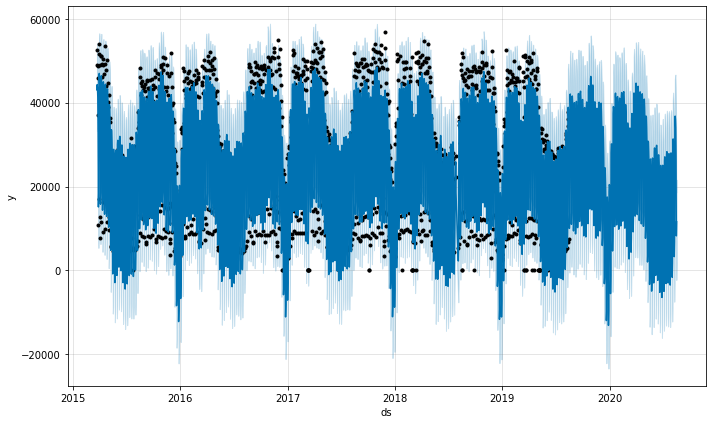

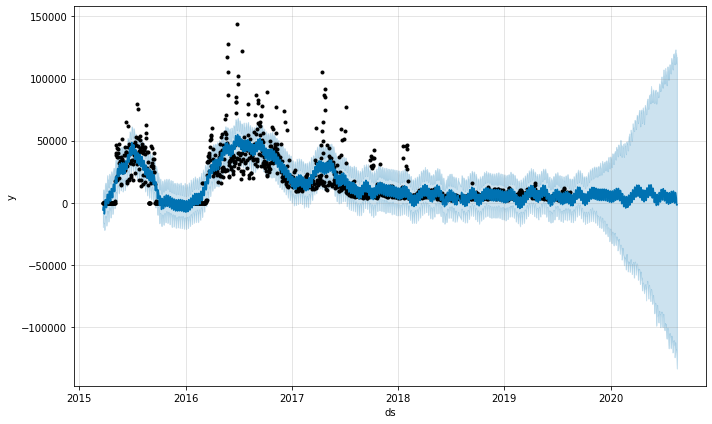

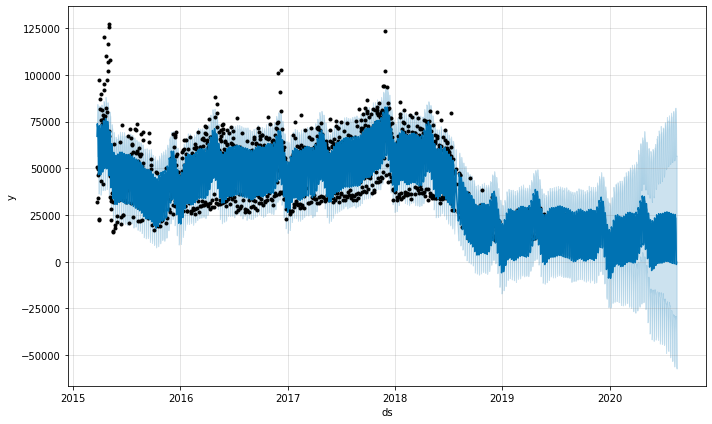

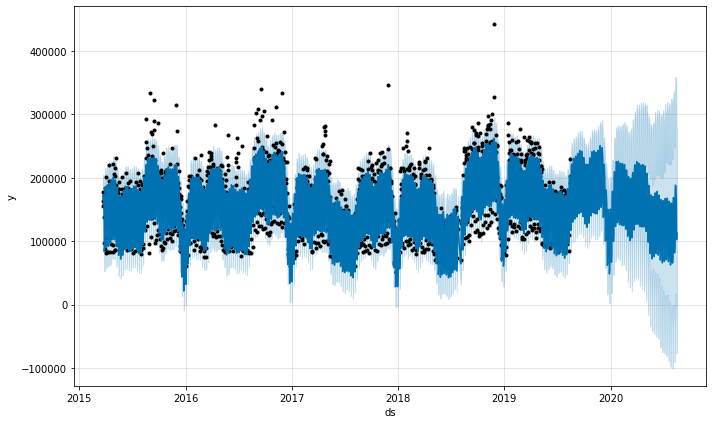

In [261]:
prediction = send_prediction(five_att)

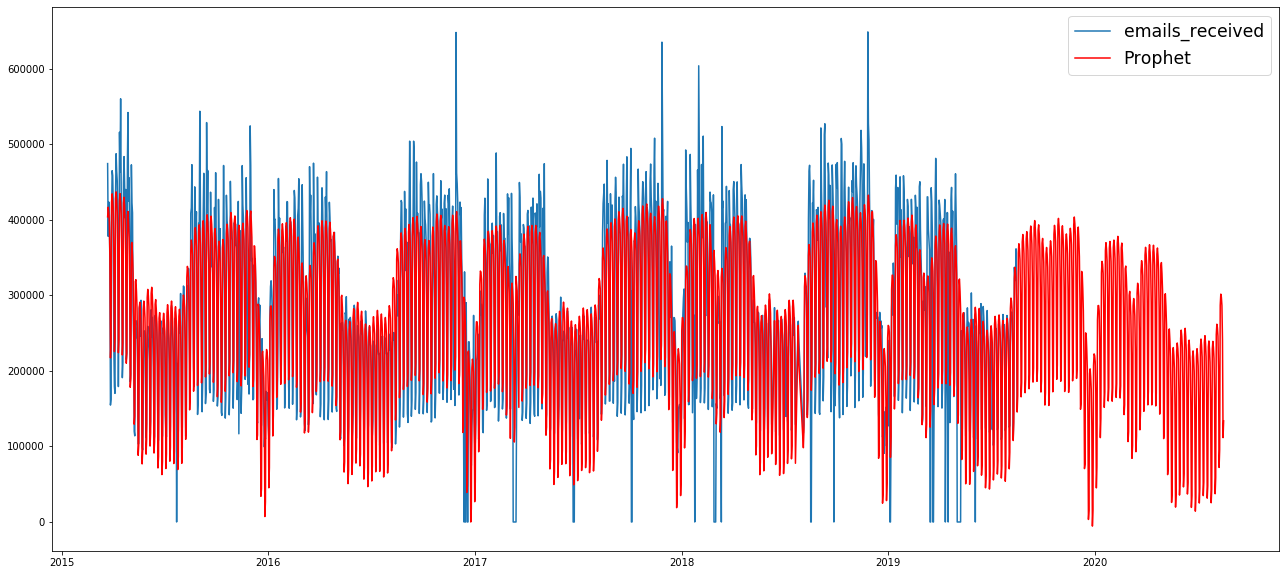

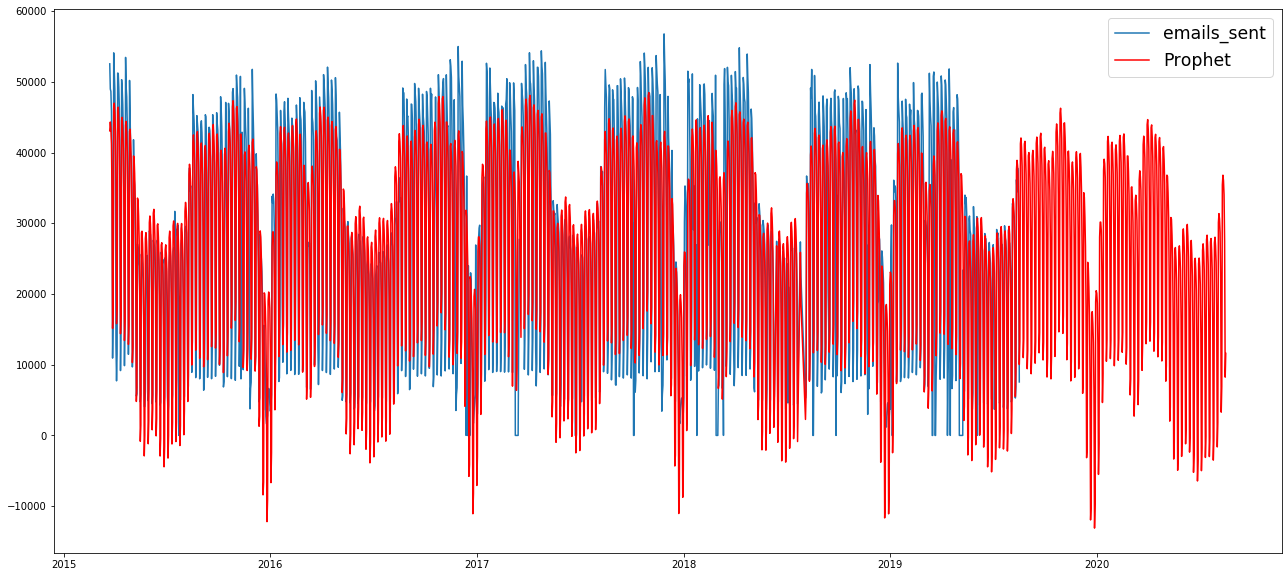

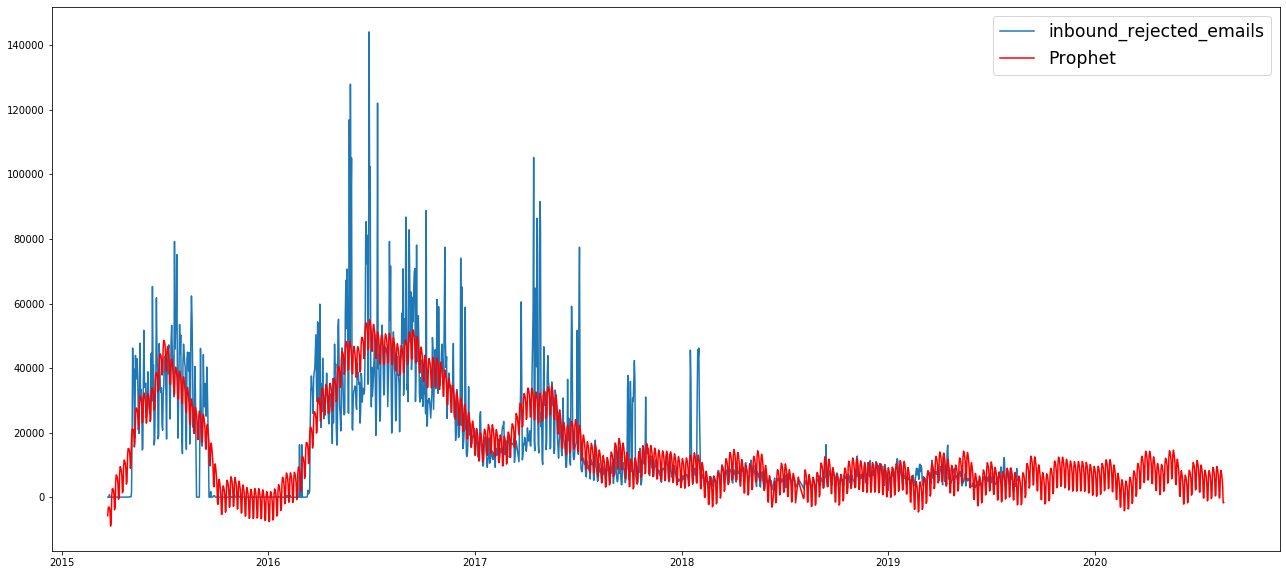

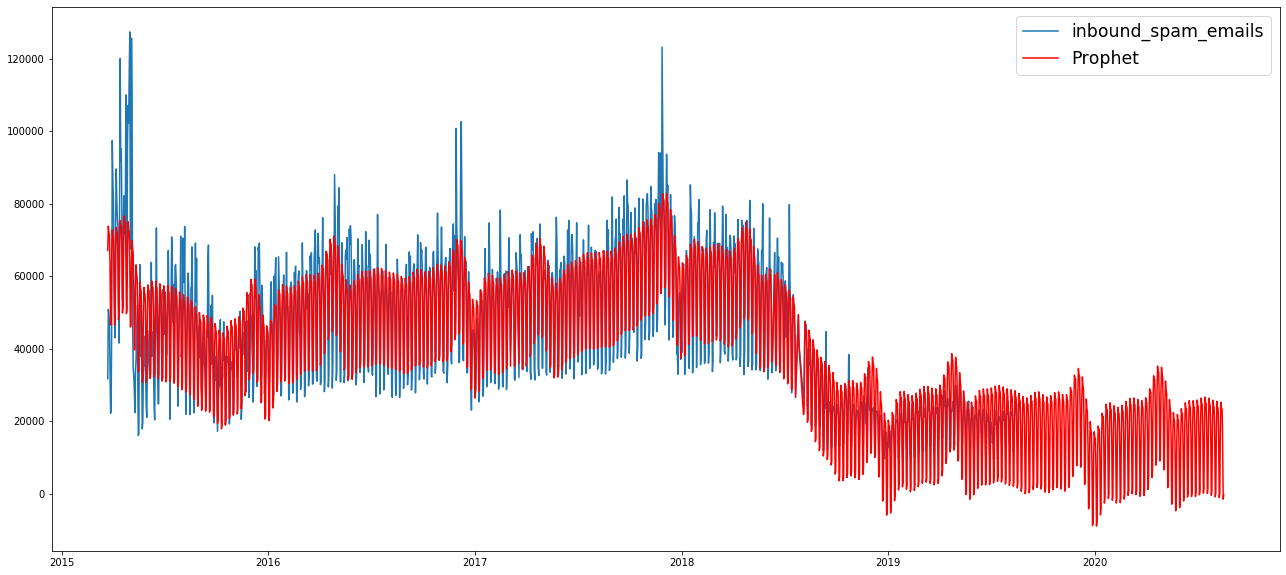

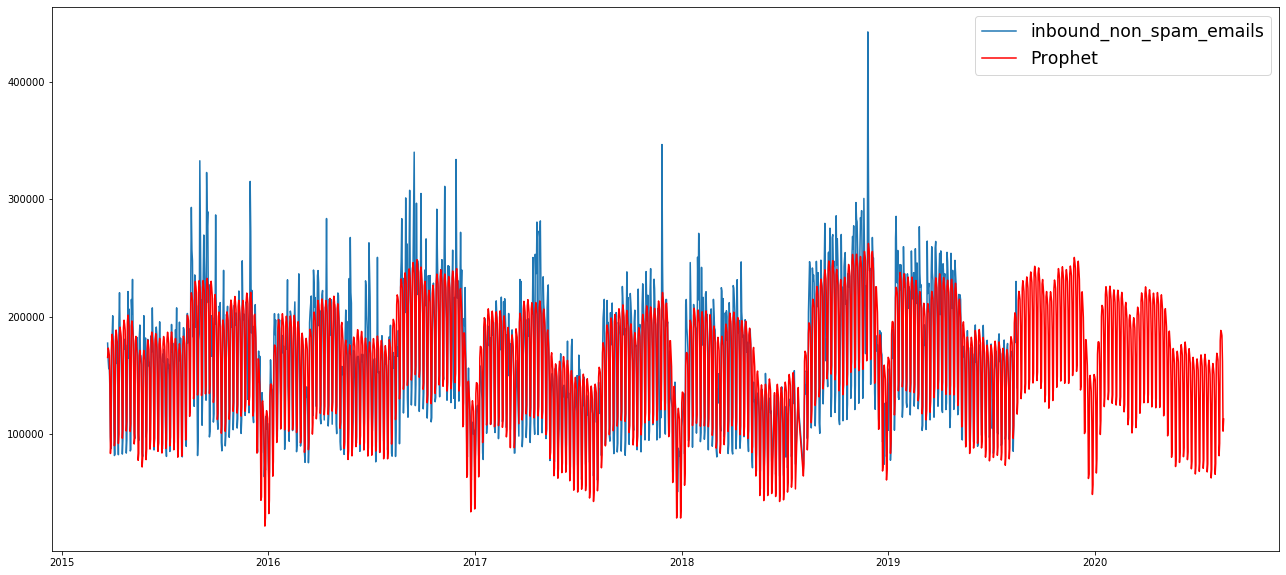

In [262]:
plot(five_att,prediction)

In [263]:
prediction

,time,emails_received,emails_sent,inbound_rejected_emails,inbound_spam_emails,inbound_non_spam_emails
0,2015-03-23,404008.767450,43064.573280,-5775.596062,67116.091647,165210.119106
1,2015-03-24,416746.774406,44310.771929,-3237.847687,73837.648965,173200.752330
2,2015-03-25,410637.292972,43410.354526,-3017.118344,72074.408851,170963.682902
3,2015-03-26,397067.327999,41250.902427,-3347.844942,71519.049647,167049.240825
4,2015-03-27,349991.005040,34467.611062,-4438.339119,63266.900805,143683.412699
5,2015-03-28,217293.453132,15133.938981,-8965.267547,46606.967469,83282.588199
6,2015-03-29,237084.561140,18323.844380,-7857.424152,47762.350326,92400.462592
7,2015-03-30,424021.905281,46217.240753,171.997225,65883.048296,178258.683343
8,2015-03-31,434438.204661,46977.810924,2569.616245,72804.116693,184959.108836
9,2015-04-01,425924.596377,45571.522974,2630.062059,71256.894448,181393.494141


Removing 0s when there is an outage

In [264]:
five_att_0_removed = pick_your_poison(3)

The five attributes


In [265]:
five_att_0_removed = five_att_0_removed [five_att_0_removed ['emails_received'] != 0] 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


emails_received_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


emails_sent_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


inbound_rejected_emails_time_prediction.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


inbound_spam_emails_time_prediction.csv
inbound_non_spam_emails_time_prediction.csv


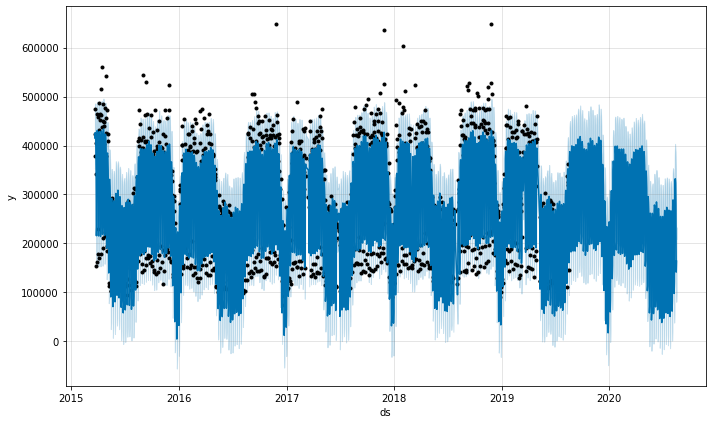

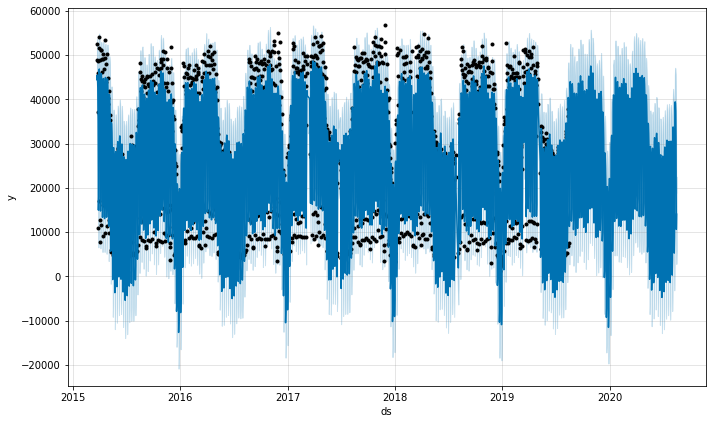

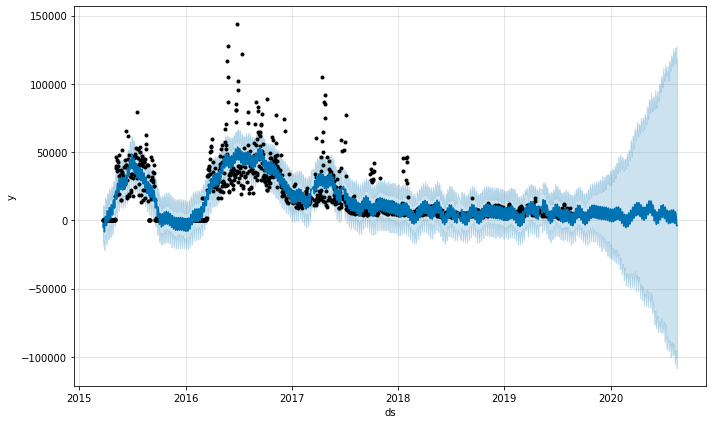

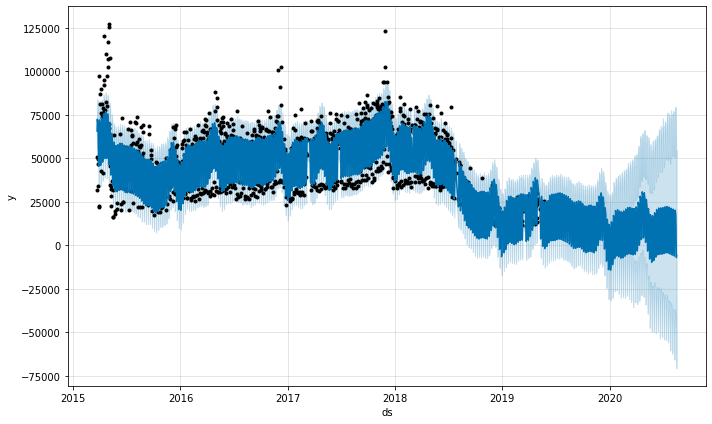

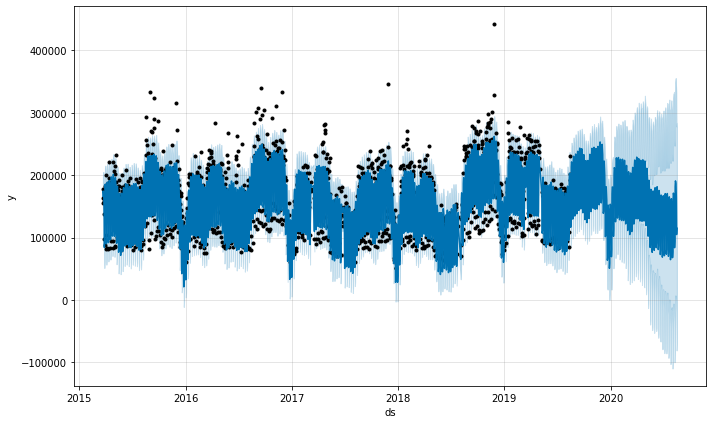

In [266]:
prediction1 = send_prediction(five_att_0_removed)

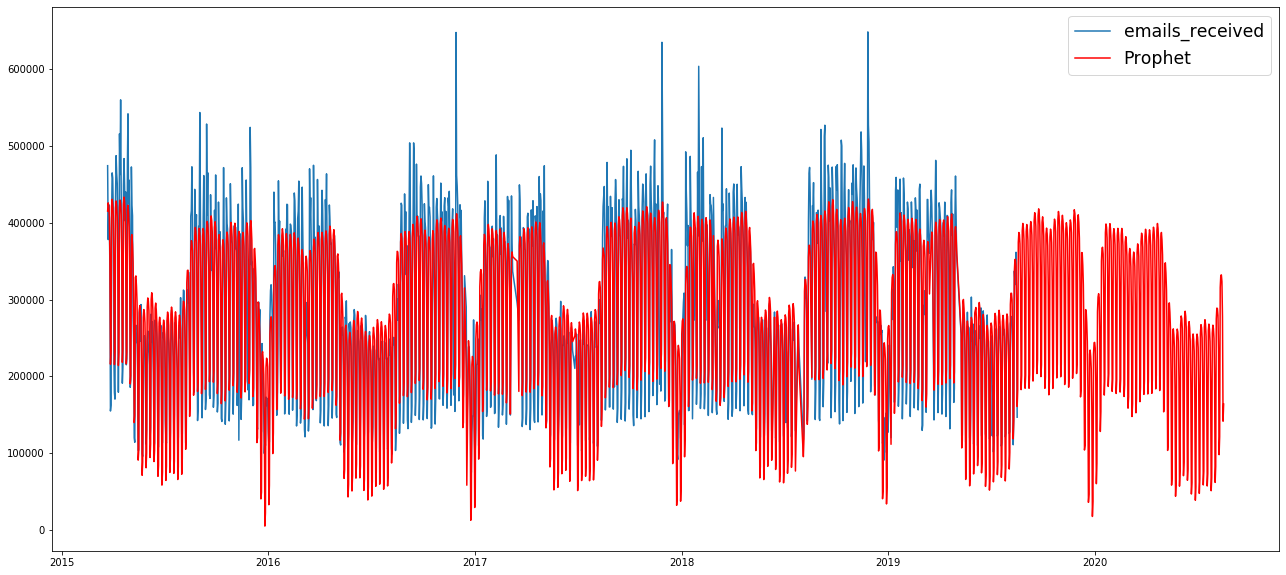

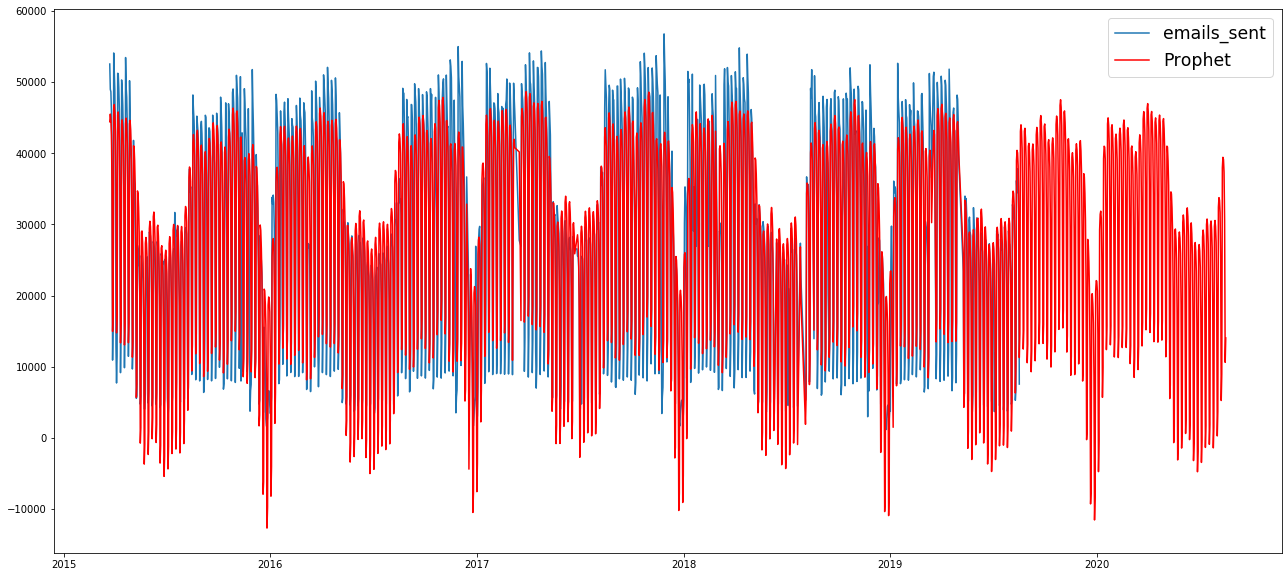

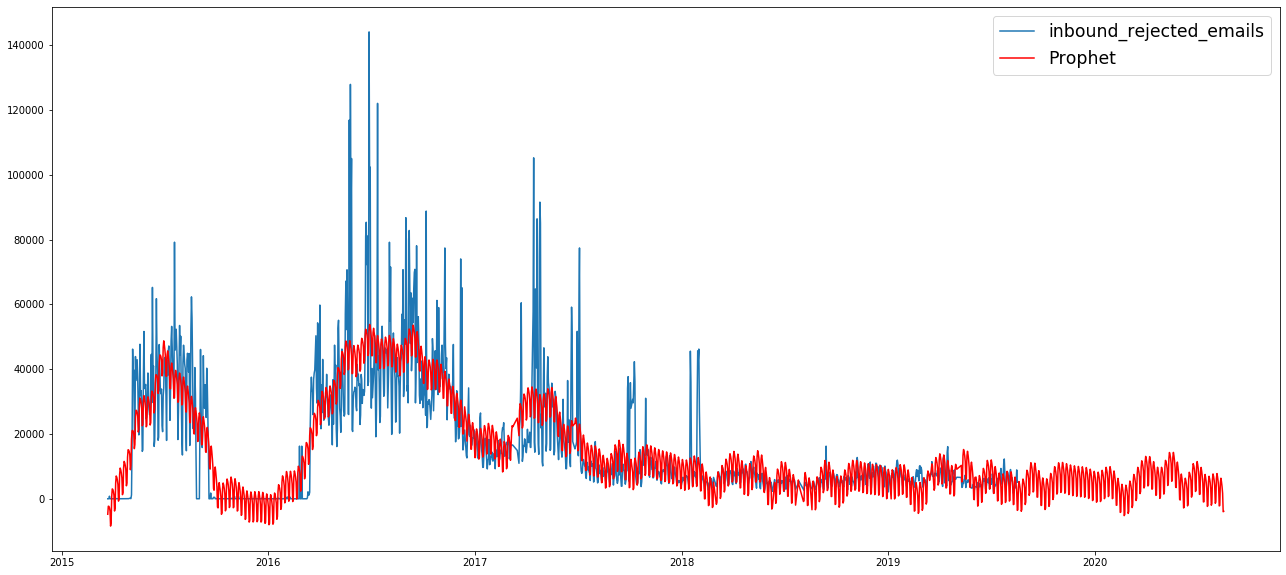

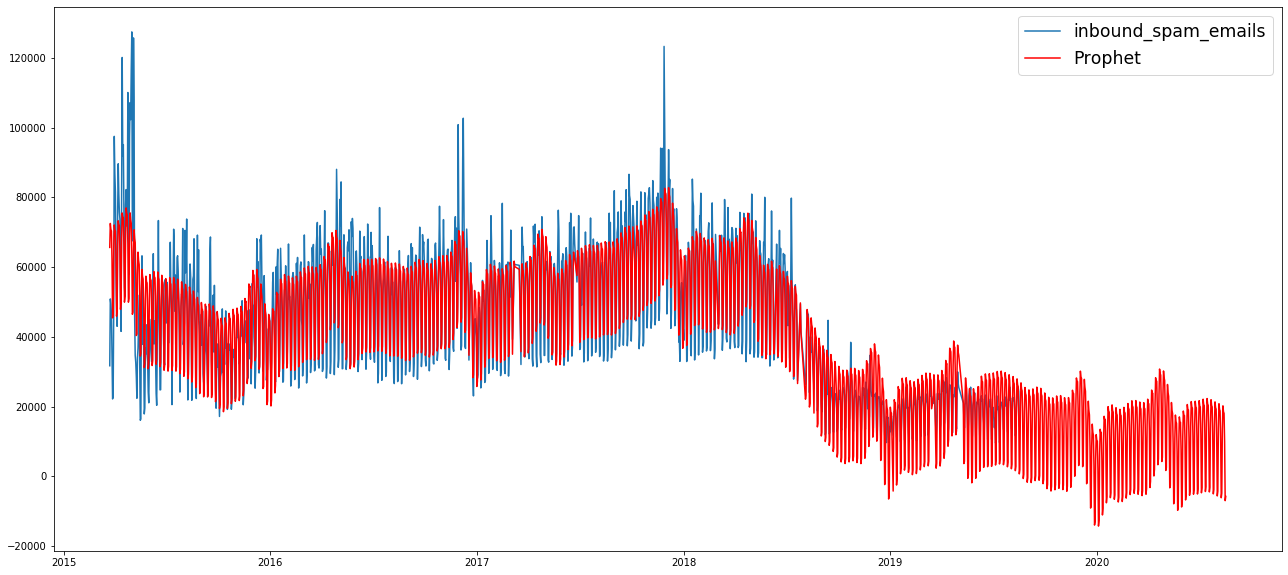

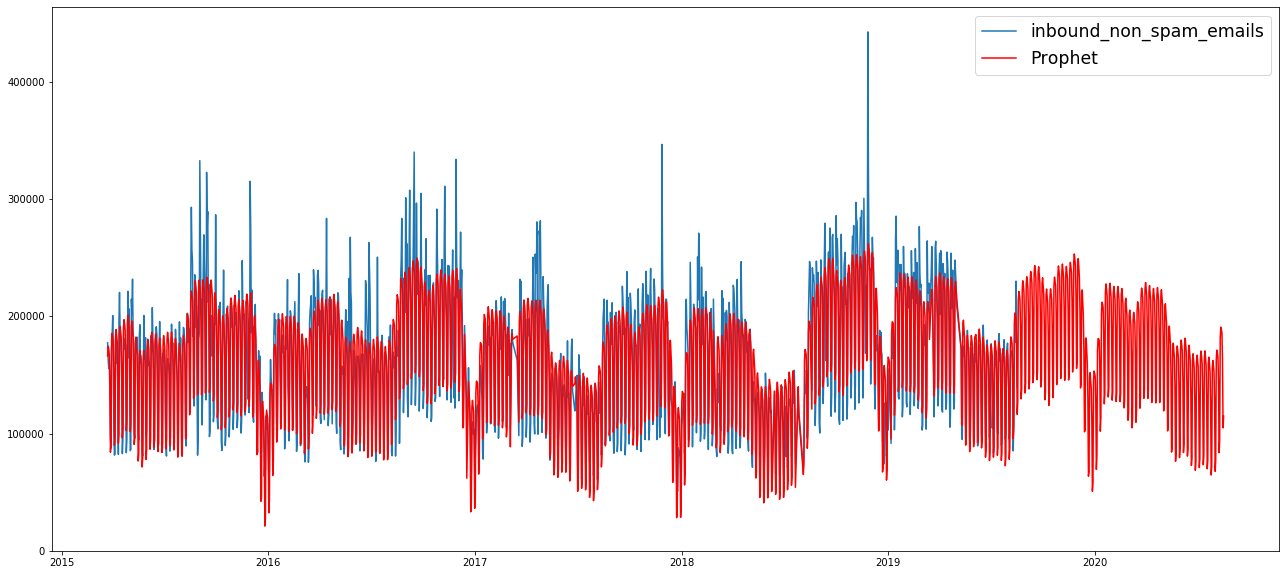

In [267]:
plot(five_att_0_removed,prediction1)

Junk below

In [93]:
five_att1 = pick_your_poison(3)

The five attributes


In [ ]:
df_with_all_preds1 = timeprediction123(df = five_att1[['time', five_att1.columns[1]]], csvfilename = five_att1.columns[1] + '_time_prediction.csv')[0]
df_with_all_preds1 = df_with_all_preds1.rename(columns= {df_with_all_preds1.columns[0] : "time", df_with_all_preds1.columns[1] : five_att1.columns[1]})
five_att1 five_att1.drop(columns= [five_att1.columns[1]])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


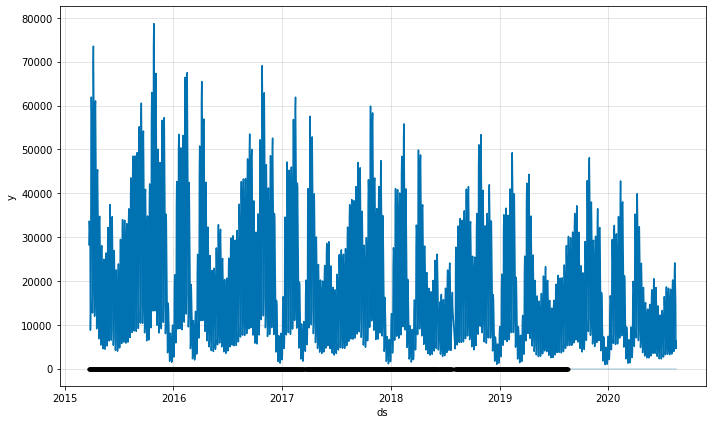

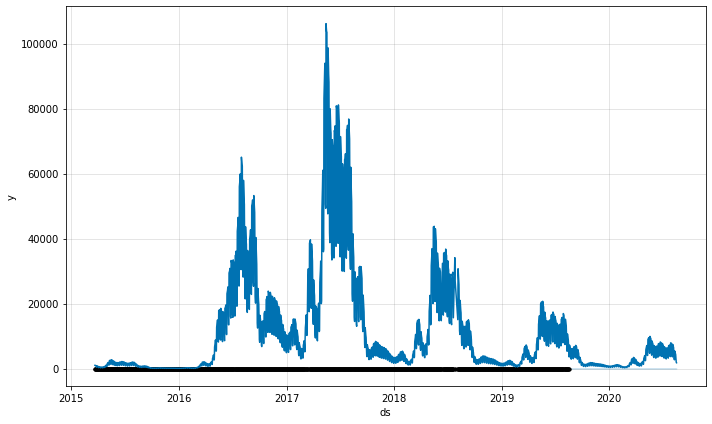

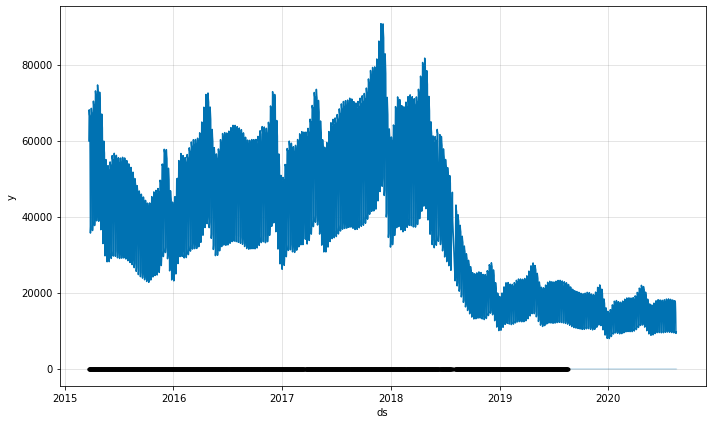

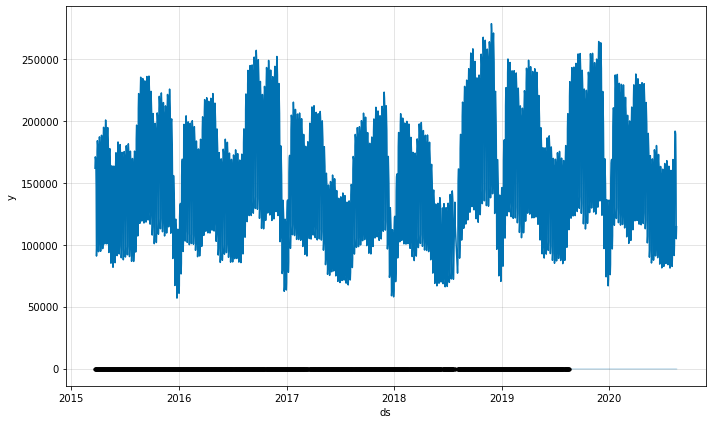

In [211]:
for x in range(len(five_att1.columns) - 1):
    h =timepredictionLog(df = five_att1[['time', five_att1.columns1[x+1]]], csvfilename = five_att1.columns1[x+1] + '_time_prediction.csv')[0]
    h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : five_att1.columns[x+1]})
    df_with_all_preds1 =  df_with_all_preds1.merge(h, on = "time")

In [213]:
heyman = time_set(df_with_all_preds)

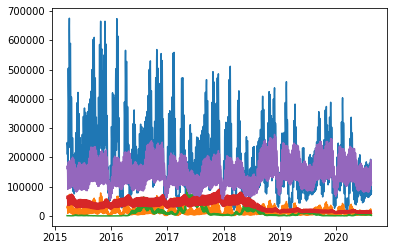

In [214]:
plt.plot(heyman)

In [215]:
df_with_all_preds.max()

emails_received            675874.538059
emails_sent                 78673.429407
inbound_rejected_emails    106130.301923
inbound_spam_emails         90762.786258
inbound_non_spam_emails    278690.892068
dtype: float64

In [216]:
df_with_all_preds.min()

emails_received            16368.246620
emails_sent                  903.888801
inbound_rejected_emails       49.845602
inbound_spam_emails         7903.073351
inbound_non_spam_emails    56924.396385
dtype: float64

In [198]:
def timeprediction12(df):
    p = Prophet(weekly_seasonality=True)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    df['y'] = df['y'] + 1
    df['y'] = np.log(df['y'])
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    time_pred[time_pred.columns[1:]] = np.exp(time_pred[time_pred.columns[1:]]) - 1
    #time_pred['yhat'] = np.exp(time_pred['yhat'])-1 
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [199]:
five_att1 = pd.read_csv(data_path2)
five_att1= five_att1[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


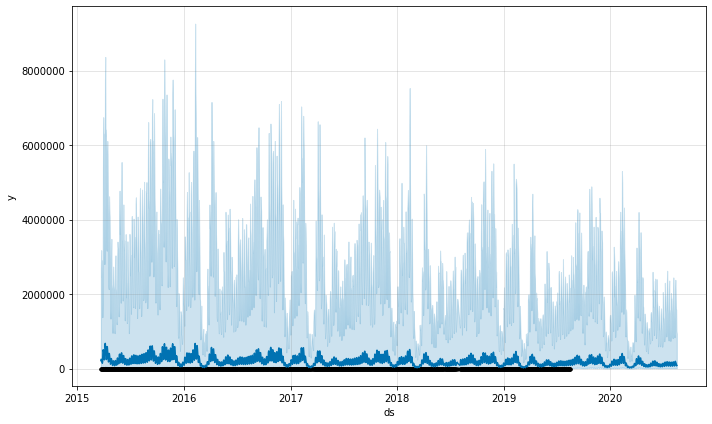

In [200]:
shid = timeprediction12(five_att1[['time','emails_received']])[2]